In [20]:
#Import dependencies
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
from datetime import datetime


In [21]:
#Set path of input file
file_path = "Resources/US_Salary_Cleaned.csv"
#Read input file into a DataFrame
salaries_df = pd.read_csv(file_path)
salaries_df

,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country
0,2017-06-07 11:33:00,Oracle,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,0,Redwood City,CA,USA
1,2017-06-10 17:11:00,eBay,Software Engineer,100000,5.0,3.0,100000,0.0,0.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,USA
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
3,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,5.0,3.0,157000,0.0,0.0,none,...,0,0,0,0,0,0,0,Mountain View,CA,USA
4,2017-06-21 17:27:00,Microsoft,Software Engineer,208000,8.5,8.5,208000,0.0,0.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44718,2018-09-09 11:52:00,Google,Software Engineer,327000,10.0,1.0,155000,150000.0,22000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
44719,2018-09-13 08:23:00,Microsoft,Software Engineer,237000,2.0,2.0,146900,73200.0,16000.0,none,...,0,0,0,0,0,0,0,Redmond,WA,USA
44720,2018-09-13 14:35:00,MSFT,Software Engineer,220000,14.0,12.0,157000,25000.0,20000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
44721,2018-09-16 16:10:00,Salesforce,Software Engineer,280000,8.0,4.0,194688,57000.0,29000.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,USA


In [22]:
#try linear model on subsets by job title
salaries_df['title'].unique()

array(['Product Manager', 'Software Engineer',
       'Software Engineering Manager', 'Data Scientist',
       'Solution Architect', 'Technical Program Manager',
       'Human Resources', 'Product Designer', 'Marketing',
       'Business Analyst', 'Hardware Engineer', 'Recruiter',
       'Mechanical Engineer', 'Sales', 'Management Consultant'],
      dtype=object)

In [23]:
software_engineer_df = salaries_df.loc[salaries_df['title']=='Software Engineer']
data_scientist_df = salaries_df.loc[salaries_df['title']=='Data Scientist']
business_analyst_df = salaries_df.loc[salaries_df['title']=='Business Analyst']
print(len(software_engineer_df), len(data_scientist_df))

29776 1980


In [24]:
def simple_regression(df):
    # The data in the df column must be reshaped into an array with shape (num_samples, num_features)
    X = df.yearsofexperience.values.reshape(-1, 1)
    y = df.basesalary
    # Create a model with scikit-learn
    model = LinearRegression()
    # Fit the data into the model
    model.fit(X, y)
    # The model creates predicted y values based on X values
    y_pred = model.predict(X)
    #corr_coef = np.corrcoef(X,df.basesalary)
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='red')
    plt.xlabel('Years of Experience')
    plt.ylabel('Total Yearly Compensation in USD')
    plt.show()
    print(f"The slope is {model.coef_}")
    print(f"The intercept is {model.intercept_}")
    X = df.yearsofexperience
    y = df.totalyearlycompensation
    slope, intercept, r, p, std_err  = stats.linregress(X, y)
    print(f"The correlation coefficient is {r}")
    
def simple_regression_base(df):
     # The data in the df column must be reshaped into an array with shape (num_samples, num_features)
    X = df.yearsofexperience.values.reshape(-1, 1)
    y = df.basesalary
    # Create a model with scikit-learn
    model = LinearRegression()
    # Fit the data into the model
    model.fit(X, y)
    # The model creates predicted y values based on X values
    y_pred = model.predict(X)
    #corr_coef = np.corrcoef(X,df.basesalary)
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='red')
    plt.xlabel('Years of Experience')
    plt.ylabel('Total Yearly Compensation in USD')
    plt.show()
    print(f"The slope is {model.coef_}")
    print(f"The intercept is {model.intercept_}")
    X = df.yearsofexperience
    y = df.totalyearlycompensation
    slope, intercept, r, p, std_err  = stats.linregress(X, y)
    print(f"The correlation coefficient is {r}")

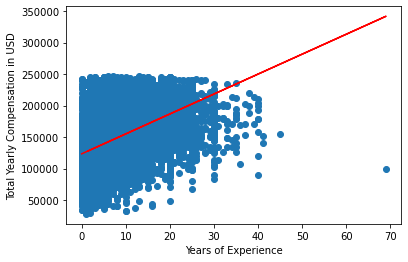

The slope is [3166.59013187]
The intercept is 123414.11553261594
The correlation coefficient is 0.39883154620568173


In [25]:
#Regression for all data on total salary
simple_regression(salaries_df)

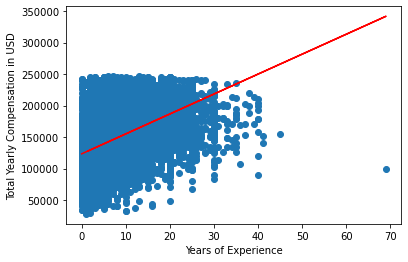

The slope is [3166.59013187]
The intercept is 123414.11553261594
The correlation coefficient is 0.39883154620568173


In [26]:
#Regression for all data on base salary
simple_regression_base(salaries_df)

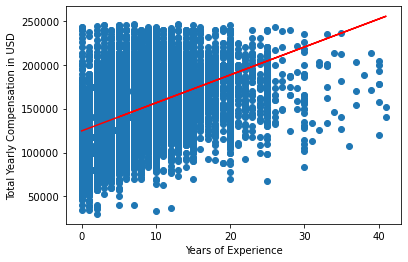

The slope is [3187.36030631]
The intercept is 124660.14690596002
The correlation coefficient is 0.37404629670539263


In [27]:
#regression for software engineers total salary
simple_regression(software_engineer_df)

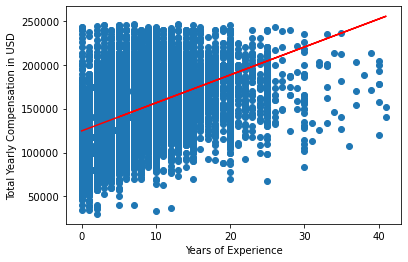

The slope is [3187.36030631]
The intercept is 124660.14690596002
The correlation coefficient is 0.37404629670539263


In [28]:
#regression for software engineers base salary
simple_regression_base(software_engineer_df)

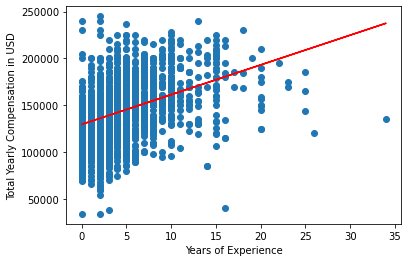

The slope is [3175.64506879]
The intercept is 129564.33287149516
The correlation coefficient is 0.32987014174938395


In [29]:
#regression for data scientist total salary
simple_regression(data_scientist_df)

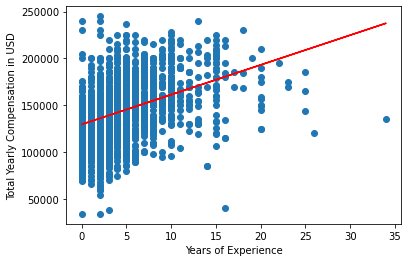

The slope is [3175.64506879]
The intercept is 129564.33287149516
The correlation coefficient is 0.32987014174938395


In [30]:
#regression for data scientist base salary
simple_regression_base(data_scientist_df)

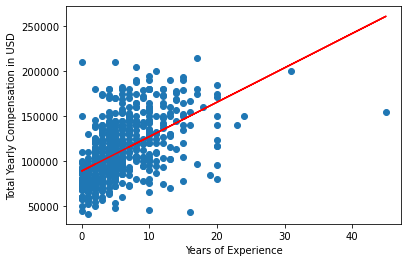

The slope is [3835.2902419]
The intercept is 88831.04591991761
The correlation coefficient is 0.4934131027089477


In [31]:
#regression for business analysts total pay
simple_regression(business_analyst_df)

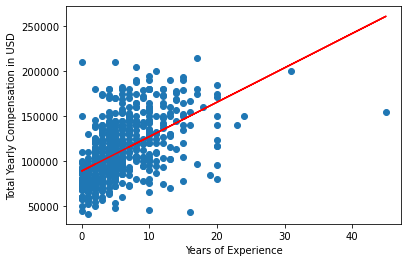

The slope is [3835.2902419]
The intercept is 88831.04591991761
The correlation coefficient is 0.4934131027089477


In [32]:
#regression for business analysts base pay
simple_regression_base(business_analyst_df)

In [33]:
salaries_df['timestamp']=pd.to_datetime(salaries_df['timestamp'])
salaries_df

,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country
0,2017-06-07 11:33:00,Oracle,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,0,Redwood City,CA,USA
1,2017-06-10 17:11:00,eBay,Software Engineer,100000,5.0,3.0,100000,0.0,0.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,USA
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
3,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,5.0,3.0,157000,0.0,0.0,none,...,0,0,0,0,0,0,0,Mountain View,CA,USA
4,2017-06-21 17:27:00,Microsoft,Software Engineer,208000,8.5,8.5,208000,0.0,0.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44718,2018-09-09 11:52:00,Google,Software Engineer,327000,10.0,1.0,155000,150000.0,22000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
44719,2018-09-13 08:23:00,Microsoft,Software Engineer,237000,2.0,2.0,146900,73200.0,16000.0,none,...,0,0,0,0,0,0,0,Redmond,WA,USA
44720,2018-09-13 14:35:00,MSFT,Software Engineer,220000,14.0,12.0,157000,25000.0,20000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
44721,2018-09-16 16:10:00,Salesforce,Software Engineer,280000,8.0,4.0,194688,57000.0,29000.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,USA


In [34]:
#datetime values seem to bomb the linear regression model, so let's create a new field that is 
#an integer that reflects the order of the dates
#try to create a field that is the number of days from the earliest posted job date
# function found at https://stackoverflow.com/questions/8419564/difference-between-two-dates-in-python
min_date = salaries_df['timestamp'].min()
salaries_df['how_long_posted'] = salaries_df['timestamp']-min_date
def return_days(date_diff):
    days = date_diff.days
    return days
salaries_df['how_long_posted'] = salaries_df['how_long_posted'].apply(return_days)
salaries_df

,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country,how_long_posted
0,2017-06-07 11:33:00,Oracle,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,Redwood City,CA,USA,0
1,2017-06-10 17:11:00,eBay,Software Engineer,100000,5.0,3.0,100000,0.0,0.0,none,...,0,0,0,0,0,0,San Francisco,CA,USA,3
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,Seattle,WA,USA,4
3,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,5.0,3.0,157000,0.0,0.0,none,...,0,0,0,0,0,0,Mountain View,CA,USA,12
4,2017-06-21 17:27:00,Microsoft,Software Engineer,208000,8.5,8.5,208000,0.0,0.0,none,...,0,0,0,0,0,0,Seattle,WA,USA,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44718,2018-09-09 11:52:00,Google,Software Engineer,327000,10.0,1.0,155000,150000.0,22000.0,none,...,0,0,0,0,0,0,Seattle,WA,USA,459
44719,2018-09-13 08:23:00,Microsoft,Software Engineer,237000,2.0,2.0,146900,73200.0,16000.0,none,...,0,0,0,0,0,0,Redmond,WA,USA,462
44720,2018-09-13 14:35:00,MSFT,Software Engineer,220000,14.0,12.0,157000,25000.0,20000.0,none,...,0,0,0,0,0,0,Seattle,WA,USA,463
44721,2018-09-16 16:10:00,Salesforce,Software Engineer,280000,8.0,4.0,194688,57000.0,29000.0,none,...,0,0,0,0,0,0,San Francisco,CA,USA,466


In [35]:
#Try whole dataset with time as the x variable
def simple_regression_time(df):
    # The data in the df column must be reshaped into an array with shape (num_samples, num_features)
    X = df.how_long_posted.values.reshape(-1, 1)
    y = df.basesalary
    # Create a model with scikit-learn
    model = LinearRegression()
    # Fit the data into the model
    model.fit(X, y)
    # The model creates predicted y values based on X values
    y_pred = model.predict(X)
    #corr_coef = np.corrcoef(X,df.basesalary)
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='red')
    plt.xlabel('Days Posted')
    plt.ylabel('Total Yearly Compensation in USD')
    plt.show()
    print(f"The slope is {model.coef_}")
    print(f"The intercept is {model.intercept_}")
    X = df.how_long_posted
    y = df.basesalary
    slope, intercept, r, p, std_err  = stats.linregress(X, y)
    print(f"The correlation coefficient is {r}")

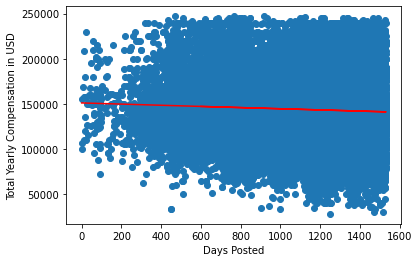

The slope is [-6.44189252]
The intercept is 150955.14158304018
The correlation coefficient is -0.056704590048401365


In [36]:
simple_regression_time(salaries_df)

In [37]:
salaries_df.dtypes

timestamp                  datetime64[ns]
company                            object
title                              object
totalyearlycompensation             int64
yearsofexperience                 float64
yearsatcompany                    float64
basesalary                          int64
stockgrantvalue                   float64
bonus                             float64
gender                             object
cityid                              int64
dmaid                             float64
rowNumber                           int64
Masters_Degree                      int64
Bachelors_Degree                    int64
Doctorate_Degree                    int64
Highschool                          int64
Some_College                        int64
Race_Asian                          int64
Race_White                          int64
Race_Two_Or_More                    int64
Race_Black                          int64
Race_Hispanic                       int64
city                              

In [38]:
#Ok, there don't seem to be any linear relationships to use in the data. have to rethink